### **Eksplorasi Data & Data Pre-processing**

**Eksplorasi Data: Data dengan Statistik**

In [ ]:
import pandas as pd
dataset = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/pythonTutorial/online_raw.csv')
print("Shape dataset : ", dataset.shape)
print('\nLima data teratas')
dataset.head()
print('\nInformasi dataset')
dataset.info()
print('Statistik deskriptif')
dataset.describe()

Shape dataset :  (12330, 18)

Lima data teratas

Informasi dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region   

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
dataset_corr = dataset.corr()
print('Korelasi dataset:\n', dataset.corr())
print('Distribusi Label (Revenue):\n', dataset['Revenue'].value_counts())
# Tugas praktek
print('\nKorelasi BounceRates-ExitRates:', dataset_corr.loc['BounceRates', 'ExitRates'])
print('\nKorelasi Revenue-PageValues:', dataset_corr.loc['Revenue', 'PageValues'])
print('\nKorelasi TrafficType-Weekend:', dataset_corr.loc['TrafficType', 'Weekend'])

Korelasi dataset:
                          Administrative  ...   Revenue
Administrative                 1.000000  ...  0.138631
Administrative_Duration        0.601466  ...  0.093395
Informational                  0.376782  ...  0.095085
Informational_Duration         0.255757  ...  0.070250
ProductRelated                 0.430832  ...  0.158280
ProductRelated_Duration        0.373647  ...  0.152130
BounceRates                   -0.223474  ... -0.150621
ExitRates                     -0.316192  ... -0.206886
PageValues                     0.098771  ...  0.492569
SpecialDay                    -0.095054  ... -0.082305
OperatingSystems              -0.006459  ... -0.014668
Browser                       -0.025243  ...  0.023984
Region                        -0.005680  ... -0.011595
TrafficType                   -0.033748  ... -0.005113
Weekend                        0.026404  ...  0.029295
Revenue                        0.138631  ...  1.000000

[16 rows x 16 columns]
Distribusi Label (Reve

**Eksplorasi Data: Memahami Data dengan Visual**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


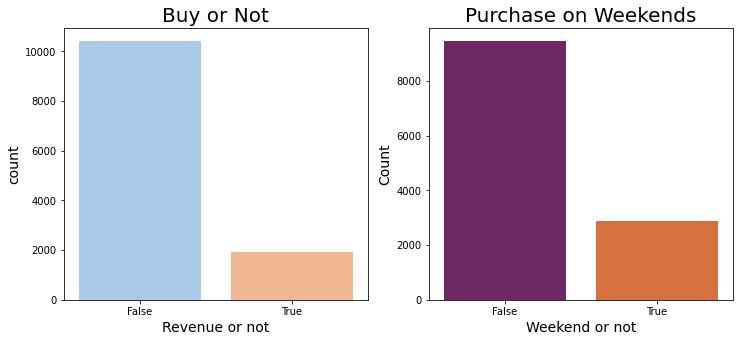

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# checking the Distribution of customers on Revenue
plt.rcParams['figure.figsize'] = (12,5)
plt.subplot(1, 2, 1)
sns.countplot(dataset['Revenue'], palette = 'pastel')
plt.title('Buy or Not', fontsize = 20)
plt.xlabel('Revenue or not', fontsize = 14)
plt.ylabel('count', fontsize = 14)

# checking the Distribution of customers on Weekend
plt.subplot(1, 2, 2)
sns.countplot(dataset['Weekend'], palette = 'inferno')
plt.title('Purchase on Weekends', fontsize = 20)
plt.xlabel('Weekend or not', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.show()

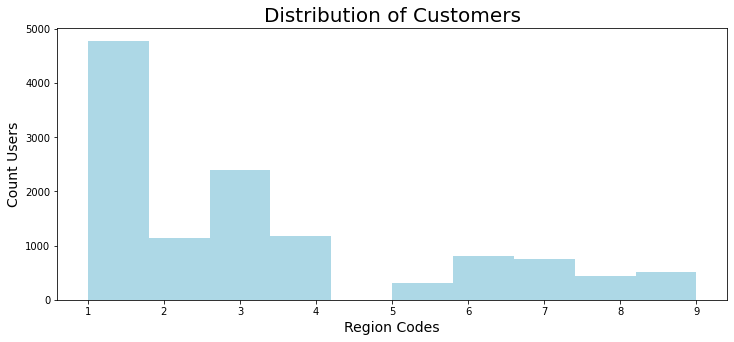

In [ ]:
import matplotlib.pyplot as plt

# visualizing the distribution of customers around the Region
plt.hist(dataset['Region'], color = 'lightblue')
plt.title('Distribution of Customers' , fontsize = 20)
plt.xlabel('Region Codes', fontsize = 14)
plt.ylabel('Count Users', fontsize = 14)
plt.show()

**Data Pre-processing: Handling Missing Value**

In [ ]:
#checking missing value for each feature
print('Checking missing value for each feature:')
print(dataset.isnull().sum())

#Counting total missing value
print('\nCounting total missing value:')
dataset.isnull().sum().sum()

Checking missing value for each feature:
Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

Counting total missing value:


112

In [ ]:
#Drop rows with missing value
dataset_clean = dataset.dropna()
print('Ukuran dataset_clean:', dataset_clean.shape)

Ukuran dataset_clean: (12316, 18)


In [ ]:
print("Before imputation:")
# Checking missing value for each feature
print(dataset.isnull().sum())
# Counting total missing value
print(dataset.isnull().sum().sum())

print("\nAfter imputation:")
# Fill missing value with mean of feature value
dataset.fillna(dataset.mean(), inplace = True)
# Checking missing value for each feature
print(dataset.isnull().sum())
# Counting total missing value
print(dataset.isnull().sum().sum())

Before imputation:
Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64
112

After imputation:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0

In [ ]:
import pandas as pd
dataset1 = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/pythonTutorial/online_raw.csv')

print("Before imputation:")
# Checking missing value for each feature
print(dataset1.isnull().sum())
# Counting total missing value
print(dataset1.isnull().sum().sum())

print("\nAfter imputation:")
# Fill missing value with median of feature value
dataset1.fillna(dataset1.median(), inplace = True)
# Checking missing value for each feature
print(dataset1.isnull().sum())
# Counting total missing value
print(dataset1.isnull().sum().sum())

Before imputation:
Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64
112

After imputation:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0

**Data Preprocessing: Scaling**

Beberapa machine learning seperti K-NN dan gradient descent mengharuskan semua variabel memiliki rentang nilai yang sama, karena jika tidak sama, feature dengan rentang nilai terbesar misalnya ProductRelated_Duration otomatis akan menjadi feature yang paling mendominasi dalam proses training/komputasi, sehingga model yang dihasilkan pun akan sangat bias. Oleh karena itu, sebelum memulai training model, kita terlebih dahulu perlu melakukan data rescaling ke dalam rentang 0 dan 1, sehingga semua feature berada dalam rentang nilai tersebut, yaitu nilai max = 1 dan nilai min = 0. Data rescaling ini dapat dilakukan di Python menggunakan .MinMaxScaler( ) dari Scikit-Learn library.

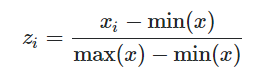

dengan rumus ini, nilai max data akan menjadi 1 dan nilai min menjadi 0; dan nilai lainnya berada di rentang keduanya. Rumus ini tidak memungkinkan adanya rentang nilai selain 0 – 1.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#Define MinMaxScaler as scaler
scaler = MinMaxScaler()

#list all the feature that need to be scaled
scaling_column = ['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues']

#Apply fit_transfrom to scale selected feature
dataset[scaling_column] = scaler.fit_transform(dataset[scaling_column])

#Cheking min and max value of the scaling_column
print(dataset[scaling_column].describe().T[['min','max']])

                         min  max
Administrative           0.0  1.0
Administrative_Duration  0.0  1.0
Informational            0.0  1.0
Informational_Duration   0.0  1.0
ProductRelated           0.0  1.0
ProductRelated_Duration  0.0  1.0
BounceRates              0.0  1.0
ExitRates                0.0  1.0
PageValues               0.0  1.0


**Data Pre-processing: Konversi string ke numerik**

Karena setiap algoritma machine learning bekerja dengan menggunakan nilai numeris, maka kita perlu mengubah kolom dengan tipe pandas object atau str ini ke bertipe numeris.

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Convert feature/column 'Month'
LE = LabelEncoder()
dataset['Month'] = LE.fit_transform(dataset['Month'])
print(LE.classes_)
print(np.sort(dataset['Month'].unique()))
print('')

# Convert feature/column 'VisitorType'
LE = LabelEncoder()
dataset['VisitorType'] = LE.fit_transform(dataset['VisitorType'])
print(LE.classes_)
print(np.sort(dataset['VisitorType'].unique()))

['Aug' 'Dec' 'Feb' 'Jul' 'June' 'Mar' 'May' 'Nov' 'Oct' 'Sep']
[0 1 2 3 4 5 6 7 8 9]

['New_Visitor' 'Other' 'Returning_Visitor']
[0 1 2]


### **Scikit-Learn**

**Features & Label**

In [ ]:
# removing the target column Revenue from dataset and assigning to X
X = dataset.drop(['Revenue'], axis = 1)
# assigning the target column Revenue to y
y = dataset['Revenue']

# checking the shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (12330, 17)
Shape of y: (12330,)


**Training dan Test Dataset**

In [ ]:
from sklearn.model_selection import train_test_split

# splitting the X, and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# checking the shapes
print("Shape of X_train :", X_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of X_train : (9864, 17)
Shape of y_train : (9864,)
Shape of X_test : (2466, 17)
Shape of y_test : (2466,)


**Training Model: Fit**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Call the classifier
model = DecisionTreeClassifier()

# Fit the classifier to the training data
model = model.fit(X_train, y_train)

**Training Model: Predict**

In [ ]:
# Apply the classifier/model to the test data
y_pred = model.predict(X_test)
print(y_pred.shape)

(2466,)


**Evaluasi Model Performance**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# evaluating the model
print('Training Accuracy :', model.score(X_train, y_train))
print('Testing Accuracy :', model.score(X_test, y_test))

# confusion matrix
print('\nConfusion matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)

# classification report
print('\nClassification report:')
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 1.0
Testing Accuracy : 0.8617193836171938

Confusion matrix:
[[1886  158]
 [ 183  239]]

Classification report:
              precision    recall  f1-score   support

       False       0.91      0.92      0.92      2044
        True       0.60      0.57      0.58       422

    accuracy                           0.86      2466
   macro avg       0.76      0.74      0.75      2466
weighted avg       0.86      0.86      0.86      2466



### **Supervised Learning**

**Logistic Regression**

Logistic Regression merupakan salah satu algoritma klasifikasi dasar yang cukup popular. Secara sederhana, Logistic regression hampir serupa dengan linear regression tetapi linear regression digunakan untuk Label atau Target Variable yang berupa numerik atau continuous value, sedangkan Logistic regression digunakan untuk Label atau Target yang berupa categorical/discrete value.

Contoh continuous value adalah harga rumah, harga saham, suhu, dsb; dan contoh dari categorical value adalah prediksi SPAM or NOT SPAM (1 dan 0) atau prediksi customer SUBSCRIBE atau UNSUBSCRIBED (1 dan 0).

Pemodelan Logistic Regression dengan memanfaatkan Scikit-Learn menggunakan dataset yang sama yaitu online_raw, dan setelah dataset dibagi ke dalam Training Set dan Test Set, cukup menggunakan modul linear_model dari Scikit-learn, dan memanggil fungsi LogisticRegression() yang diberi nama logreg. Kemudian, model yang sudah ditraining ini  bisa digunakan untuk memprediksi output/label dari test dataset sekaligus mengevaluasi model performance dengan fungsi score(), confusion_matrix() dan classification_report().

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Call the classifier
logreg = LogisticRegression()
# Fit the classifier to the training data
logreg = logreg.fit(X_train,y_train)
#Training Model: Predict
y_pred = logreg.predict(X_test)

#Evaluate Model Performance
print('Training Accuracy :', model.score(X_train, y_train))
print('Testing Accuracy :', model.score(X_test, y_test))

# confusion matrix
print('\nConfusion matrix')
cm = confusion_matrix(y_test, y_pred)
print(cm)

# classification report
print('\nClassification report')
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 1.0
Testing Accuracy : 0.8617193836171938

Confusion matrix
[[2010   34]
 [ 316  106]]

Classification report
              precision    recall  f1-score   support

       False       0.86      0.98      0.92      2044
        True       0.76      0.25      0.38       422

    accuracy                           0.86      2466
   macro avg       0.81      0.62      0.65      2466
weighted avg       0.85      0.86      0.83      2466



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Decision Tree**

Decision Tree merupakan salah satu metode klasifikasi yang populer dan banyak diimplementasikan serta mudah diinterpretasi. Decision tree adalah model prediksi dengan struktur pohon atau struktur berhierarki. Decision Tree dapat digunakan untuk classification problem dan regression problem.

Decision tree terdiri dari :

1.   Decision Node yang merupakan feature/input variabel;
2.   Branch yang ditunjukkan oleh garis hitam berpanah, yang adalah rule/aturan keputusan, dan
3. Leaf yang merupakan output/hasil.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Call the classifier
decision_tree = DecisionTreeClassifier()
# Fit the classifier to the training data
decision_tree = decision_tree.fit(X_train,y_train)

# evaluating the decision_tree performance
print('Training Accuracy :', decision_tree.score(X_train, y_train))
print('Testing Accuracy :', decision_tree.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.8634766153014328


**Linear Regression**

Regresi digunakan untuk memprediksi output label yang berbentuk numerik atau continuous value. Dalam proses training, model regresi akan menggunakan variabel input (features) dan variabel output (label) untuk mempelajari bagaimana hubungan/pola dari variabel input dan output.

Model regresi terdiri atas 2 tipe yaitu :

1. Simple regression model → model regresi paling sederhana, hanya terdiri dari satu feature (univariate) dan 1 target.
2. Multiple regression model → sesuai namanya, terdiri dari lebih dari satu feature (multivariate).

Linear regression digunakan untuk menganalisis hubungan linear antara dependent variabel (feature) dan independent variabel (label). Hubungan linear disini berarti bahwa jika nilai dari independen variabel mengalami perubahan baik itu naik atau turun, maka nilai dari dependen variabel juga mengalami perubahan (naik atau turun).

**from sklearn.linear_model import LinearRegression**

In [ ]:
#load dataset
import pandas as pd
housing = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/pythonTutorial/housing_boston.csv')

#Data rescaling
from sklearn import preprocessing
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
housing[['RM','LSTAT','PTRATIO','MEDV']] = data_scaler.fit_transform(housing[['RM','LSTAT','PTRATIO','MEDV']])

# getting dependent and independent variables
X = housing.drop(['MEDV'], axis = 1)
y = housing['MEDV']

# checking the shapes
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

# splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# checking the shapes
print('Shape of X_train :', X_train.shape)
print('Shape of y_train :', y_train.shape)
print('Shape of X_test :', X_test.shape)
print('Shape of y_test :', y_test.shape)

#import regressor from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Call the regressor
reg = LinearRegression()

# Fit the regressor to the training data
reg = reg.fit(X_train,y_train)

# Apply the regressor/model to the test data
y_pred = reg.predict(X_test)

Shape of X: (489, 3)
Shape of y: (489,)
Shape of X_train : (342, 3)
Shape of y_train : (342,)
Shape of X_test : (147, 3)
Shape of y_test : (147,)


**Regression Performance Evaluation**

Untuk model regression, kita menghitung selisih antara nilai aktual (y_test) dan nilai prediksi (y_pred) yang disebut error

Semakin kecil nilai MSE, RMSE, dan MAE, semakin baik pula performansi model regresi. Untuk menghitung nilai MSE, RMSE dan MAE dapat dilakukan dengan menggunakan fungsi mean_squared_error () ,  mean_absolute_error () dari scikit-learn.metrics dan untuk RMSE sendiri tidak terdapat fungsi khusus di scikit-learn tapi dapat dengan mudah kita hitung dengan terlebih dahulu menghitung MSE kemudian menggunakan numpy module yaitu, sqrt() untuk memperoleh nilai akar kuadrat dari MSE.

Mean squared error of testing set: 0.010913024655841009
Mean absolute error of testing set: 0.07789896103120689
Root Mean Squared Error of testing set: 0.1044654232549747


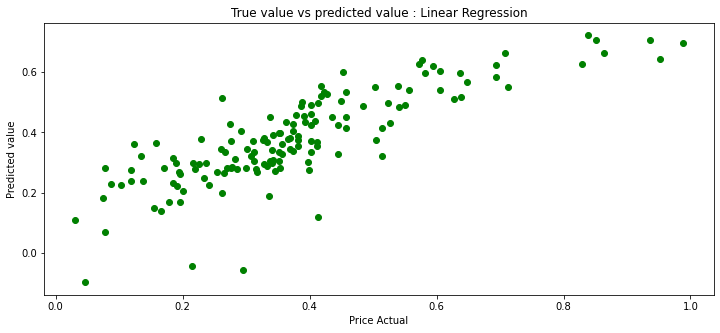

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

#Calculating MSE, lower the value better it is. 0 means perfect prediction
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error of testing set:', mse)

#Calculating MAE
mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error of testing set:', mae)
rmse = np.sqrt(mse)
print('Root Mean Squared Error of testing set:', rmse)

#Plotting y_test dan y_pred
plt.scatter(y_test, y_pred, c = 'green')
plt.xlabel('Price Actual')
plt.ylabel('Predicted value')
plt.title('True value vs predicted value : Linear Regression')
plt.show()